# **ML Data Cleaning & Feature Selection**

The MIT License

Copyright

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.






# **Content**
## **There are 25 variables:**

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_1: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)


In [120]:
#Importing the pandas,numpy & other libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Readinf the file
df = pd.read_csv('/content/credit_df.csv')

#Renaming the column for better usage
df.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)

In [114]:
#Viewing data in the file
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
#Understanding the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_1                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
#Checking for missing values in entire data set
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

- From the above data we can see that there's no missing data. Hence no need to impute any values

# Which independent variables are useful to predict a target
-We are likely to predict whether a person will default in next month or not. So, the prediction mostly depends on the independent variables like previous repayment history, Limit Balance, Age, Sex, Education & marriage. 

-Also from the data above we see none of these variables has any missing data.

# Distributions of the Predictor Variables

Showing histograms with & using kde(Kernel Density Estimation) for probability of distribution 

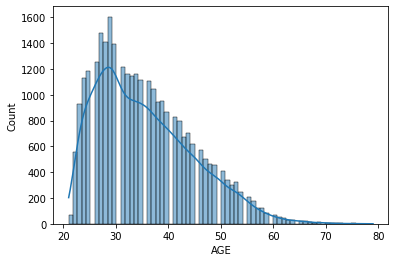

In [ ]:
sns.histplot(df.AGE, kde=True) 

By seeing the above we can see that we have more number of people between age groups 20 to 40 years of age. So we're including age feature

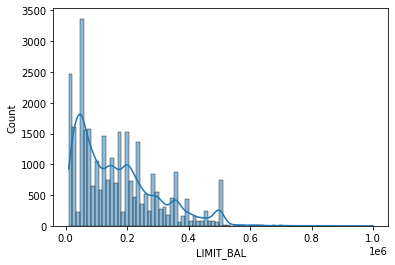

In [ ]:
sns.histplot(df.LIMIT_BAL, kde=True)

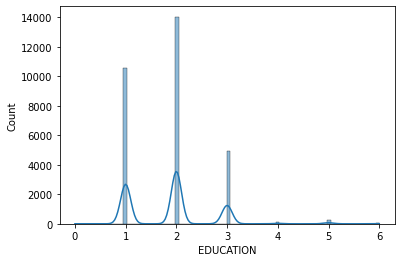

In [ ]:
sns.histplot(df.EDUCATION, kde=True)

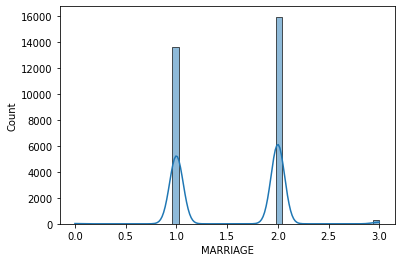

In [ ]:
sns.histplot(df.MARRIAGE, kde=True)

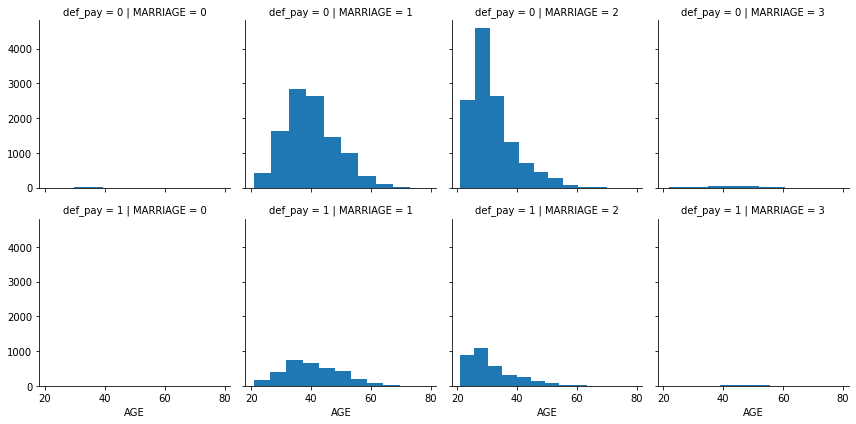

In [ ]:
g = sns.FacetGrid(df, row='def_pay', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

We can infer from above that married people within age of 30-50 & unmarried people in 20-30 are more likely to be defaulted 

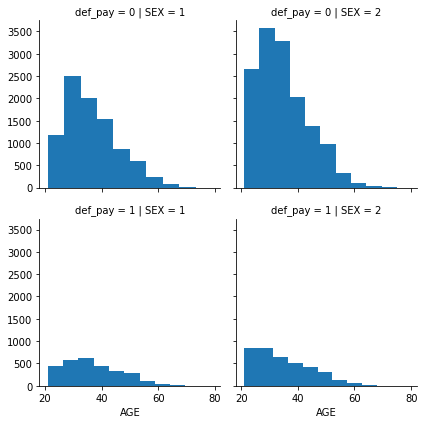

In [ ]:
g = sns.FacetGrid(df, row='def_pay', col='SEX')
g = g.map(plt.hist, 'AGE')

From above graphs we can see that females in age group between 20 to 30 are more likely to default than males & all other age groups.

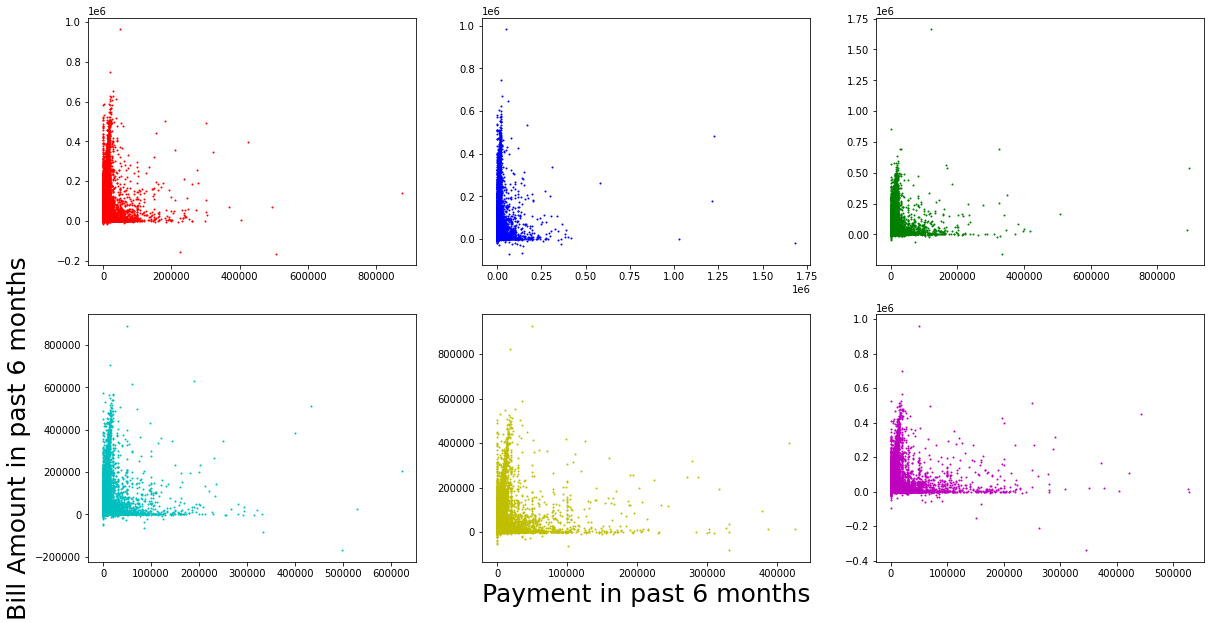

In [ ]:
#le6 means 10^6
#Plotting graphs for bill vs payements with y-axis as billed amount & x-axis as actual paid amount

plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1) #'c' is colour & 's' is size of data points

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)

plt.show()

Above code & visualization shows that higher proportion of people has bill amount high but payment done against is very low. This we can infer as the maximum number of datapoints are closely packed along the Y-axis near to 0 on X-axis

#Dependency check on predictor variables

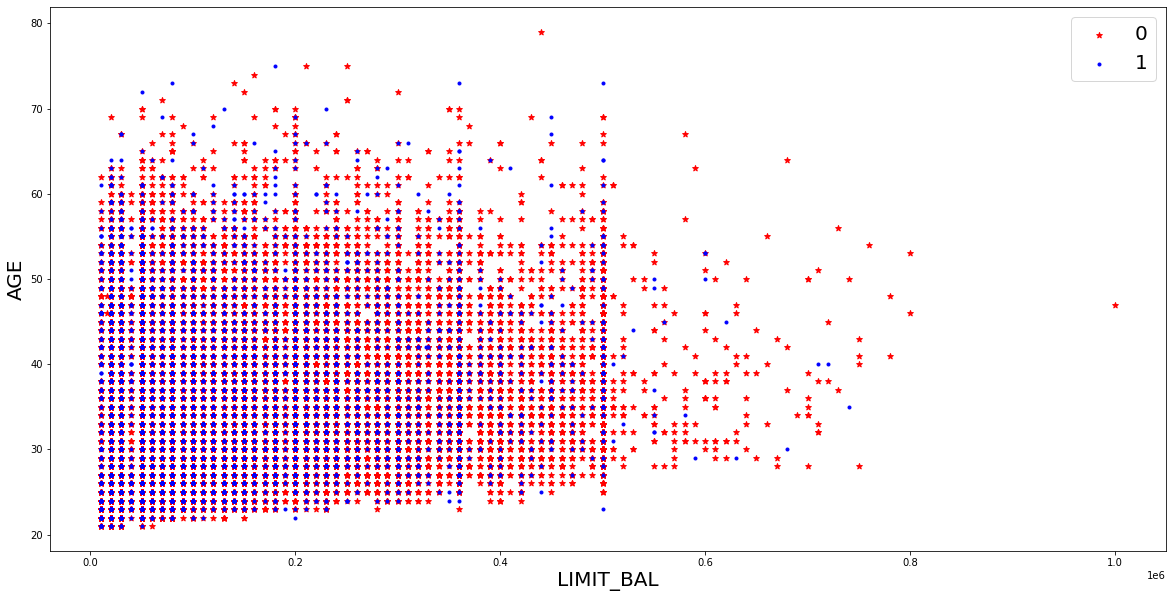

In [ ]:
#le6 means 10^6
#Took x,y values for correlation between age & limit_bal

y1 = df.AGE[df["def_pay"] == 0]
y2 = df.AGE[df["def_pay"] == 1]
x1 = df.LIMIT_BAL[df["def_pay"] == 0]
x2 = df.LIMIT_BAL[df["def_pay"] == 1]

fig,ax = plt.subplots(figsize=(20,10))
plt.scatter(x1,y1, c="r", marker="*", label='0')
plt.scatter(x2,y2, c="b", marker=".", label='1')
plt.xlabel("LIMIT_BAL", fontsize=20)
plt.ylabel("AGE", fontsize=20)
plt.legend(loc='upper right', fontsize=20) #To show the labels od data points
plt.show()

From the above data we can say that there's no correlation between age & limit provided as there's mixed variation in all age groups.

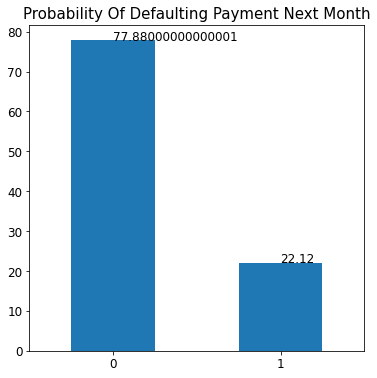

In [ ]:
#def_cnt is the column present in the data file itself

def_cnt = (df.def_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

From the above data we can see that 22% of the people are about to get defaulted next month.

# Correlation Matrix & pair plot to check the colinearity




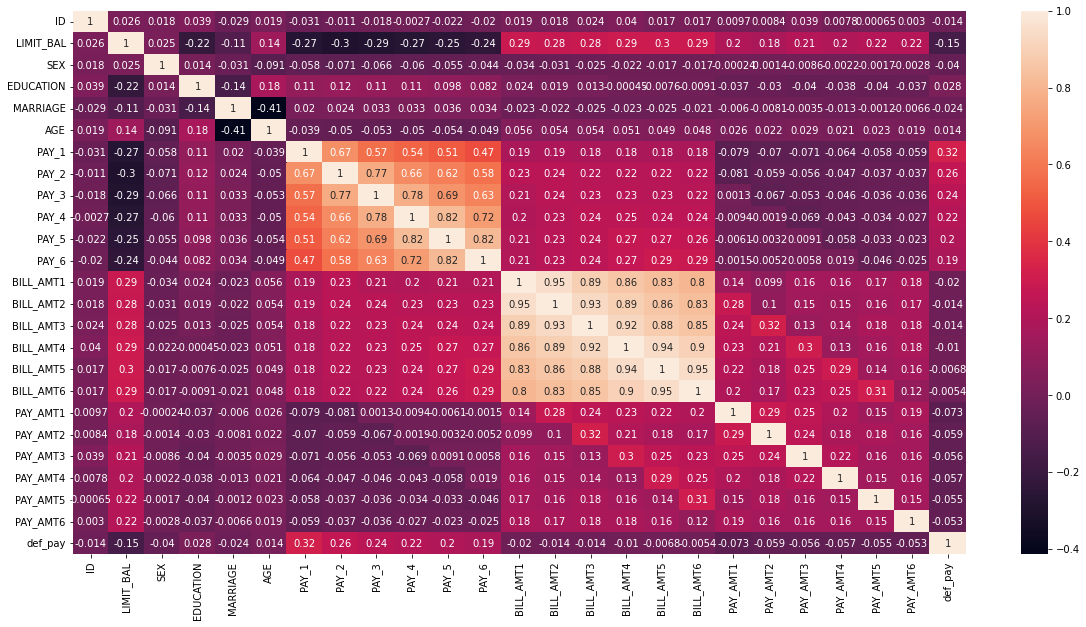

In [ ]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

From the above we can see that the defaultness is dependent on the past repayments but there're collinear

In [ ]:
sns.pairplot(df) #le6 means 10^6

Output hidden; open in https://colab.research.google.com to view.

From the above pairplot it's evedent that the payments done in previous months are colliner 

Q. Is the predictor variables independent of all the other predictor variables?

A. After observing all the data, we can say predictor variables 'Repayment'(PAY_AMT1 - PAY_AMT6) are dependent on each other. Rest all variables like education, marriage, sex, limit_bal are independent values 

#Range of predictor variables

In [64]:
#Extracting the ranges of varibles

df.describe()

,LIMIT_BAL,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.853133,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.790349,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,6.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [83]:
#The code is to check the z-score of predictor variables

import scipy.stats as stats

data = pd.DataFrame(np.random.randint(0, 10, size= (30000, 11)), columns=['AGE', 'SEX', 'EDUCATION', 'MARRIAGE', 'LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
data.apply(stats.zscore)

,AGE,SEX,EDUCATION,MARRIAGE,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,-0.529391,-1.207406,1.225502,-1.216313,1.563195,0.172130,-1.569698,-0.535492,0.184230,-0.520828,-0.184116
1,1.219081,0.876584,-0.164823,-1.216313,-0.180391,-1.226351,-0.870002,0.509053,1.573075,1.216268,-1.228710
2,-1.578474,-0.512743,-0.859986,0.172265,-0.877826,1.570611,-0.870002,0.160871,0.184230,-1.563085,-1.576908
3,-0.879085,0.181921,-0.512404,-0.869169,1.563195,0.172130,-0.870002,-0.535492,-0.510192,0.174011,-1.576908
4,0.169998,-0.512743,-0.164823,1.560842,-1.575260,-0.177491,0.179542,-1.231855,0.878652,0.174011,1.208677
...,...,...,...,...,...,...,...,...,...,...,...
29995,1.219081,1.571248,-1.555149,0.866553,0.517043,-0.876731,-0.170306,1.205416,-1.551825,1.216268,1.556875
29996,1.219081,-1.554738,-1.207567,-0.522024,0.517043,0.871370,0.179542,1.553598,-0.162981,-0.173408,-0.532314
29997,-0.179696,-1.207406,-0.859986,-0.522024,-0.180391,0.871370,-1.569698,0.509053,-0.162981,-0.173408,0.860479
29998,0.519692,-0.512743,-0.164823,-0.869169,0.865760,1.220990,0.879238,-0.187310,-1.551825,-1.215666,-0.184116


Do the ranges of the predictor variables make sense?
A. Yes. The ranges do make sense & the distribution is even;

-The age variable helped in prediction as age between 20-30 & 30-50 were seen most likely to default

-The sex variable helped as to go indepth of 20-30 age group that it's more females get default than men

-The marriage variable taken us to predict for 30-50 years old age group are likely to default

-Though marriage & sex seems collinear with age but partially & not completely dependent on age

Do the training and test sets have the same data?

A: Yes. Most of the data are same in test, train and validation data set 

#Ridge regression model

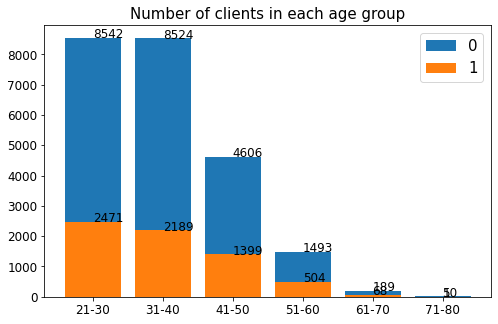

In [123]:
#Bins are used to group the variables

bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['AGE_BIN'] = pd.cut(x=df.AGE, bins=bins, labels=names, right=True)

age_cnt = df.AGE_BIN.value_counts()
age_0 = (df.AGE_BIN[df['def_pay'] == 0].value_counts())
age_1 = (df.AGE_BIN[df['def_pay'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=df, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [133]:
#Performing Ridge regression as the data is distributed evenly across the data set

df_X = df[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']]
df_y = df.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=20)

model1 = RidgeClassifier()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)
y_train_pred = model1.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      8694
           1       0.11      0.70      0.18       306

    accuracy                           0.79      9000
   macro avg       0.55      0.75      0.53      9000
weighted avg       0.96      0.79      0.86      9000

[[6910 1784]
 [  93  213]]

Test Accuracy Score for model:  0.7914444444444444

Train Accuracy Score for model:  0.7915238095238095
